In [1]:
# 시각화 준비하기: 
## 1. 라이브러리 설치: matplotlib, seaborn, koreanize-matplotlib (uv add matplotlib seaborn koreanize-matplotlib) 
## 2. 라이브러리 불러오기 
import matplotlib.pyplot as plt 
import seaborn as sns 
import koreanize_matplotlib  # noqa: F401


# 1. 데이터 불러오기

* 데이터 설명: 웹 기반 서비스 사용자 행동과 설문 기반 사용자 특성 데이터

In [2]:
# sample_data.csv 파일 열기
import pandas as pd

df = pd.read_csv(
    "./data/sample_data.csv"
)
df.head()

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
0,2024-01-01,남,대전,상,40.4,193.0,3,0
1,2024-01-02,여,대전,중,34.8,288.0,2,2
2,2024-01-03,남,서울,하,57.2,274.0,8,0
3,2024-01-04,남,대전,중,45.1,329.0,7,1
4,2024-01-05,남,서울,상,23.8,341.0,4,0


# 2. 데이터 전처리하기

## 1) 데이터 정보 확인하기

In [3]:
# 데이터 정보 확인: df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   날짜           150 non-null    object 
 1   성별           150 non-null    object 
 2   지역           150 non-null    object 
 3   만족도          150 non-null    object 
 4   평균 체류 시간(분)  150 non-null    float64
 5   월 수입(만원)     150 non-null    float64
 6   방문 페이지 수     150 non-null    int64  
 7   자녀 수         150 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 9.5+ KB


In [4]:
# 만약에 자녀 수 dtype이 object라면?
# df["자녀 수"].astype(int)

## 2) 결측치 확인하기

In [5]:
# 결측치인지 아닌지 판단하는 함수 .isna()
# 각 셀마다 결측치 이면 True, 아니면 False
df.isna()

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False


In [6]:
# 열마다의 결측치 개수
df.isna().sum()

날짜             0
성별             0
지역             0
만족도            0
평균 체류 시간(분)    0
월 수입(만원)       0
방문 페이지 수       0
자녀 수           0
dtype: int64

In [7]:
print("결측치가 없습니다.")

결측치가 없습니다.


# 3. 데이터 요약하기

In [8]:
# 요약: 데이터의 평균, 분포를 한번에 파악한다.
df.describe()

,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
count,150.000000,150.000000,150.000000,150.000000
mean,40.494000,314.613333,5.000000,1.100000
std,7.435659,62.724045,2.237568,0.939442
min,14.100000,182.000000,1.000000,0.000000
25%,35.200000,267.250000,3.000000,0.000000
50%,40.300000,314.500000,5.000000,1.000000
75%,45.250000,357.000000,6.750000,2.000000
max,57.500000,505.000000,11.000000,3.000000


# 4. 데이터 분석하기

In [9]:
# 1) 열마다 특징 파악하기
# 2) 그룹별로 특징 파악하기 
# 3) 열과 열 간의 관계 파악하기

## 1) 열마다 특징 파악하기

In [10]:
# 범주형 변수 - 카테고리
## 어떤 종류가 있나요? df[변수].unique()
## 종류는 총 몇 개인가요? df[변수].nunique()
## 카테고리별 데이터 개수를 파악해주세요. df[변수].value_counts()

# 수치형 변수 - 정수, 실수
## 열끼리 연산은 어떻게 하나요? df[변수] + df[변수]

# 정렬
## 열 기준으로 정렬하려면 어떻게 하나요? 
## df.sort_values(by=[정렬기준변수], ascending=True) # 내림차순: False

# 새로운 열 생성
## 조건마다 다르게 설정하려면 어떻게 해야 하나요?
## 1) 조건식을 새로운 변수로 만든다. -> replace로 대체
## df["total"] > total_mean -> df["new"].replace({True: "pass", False: "fail"})
## 2) np.where(조건식, True일 때 값, False일 때 값)
## 3) df[변수].apply(함수)

In [11]:
df.head()

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
0,2024-01-01,남,대전,상,40.4,193.0,3,0
1,2024-01-02,여,대전,중,34.8,288.0,2,2
2,2024-01-03,남,서울,하,57.2,274.0,8,0
3,2024-01-04,남,대전,중,45.1,329.0,7,1
4,2024-01-05,남,서울,상,23.8,341.0,4,0


### (1) '지역' 목록과 그 개수를 출력해주세요.

In [12]:
# unique()
print(df["지역"].unique())
print(f"총 {df['지역'].nunique()}개의 지역이 있습니다.")

['대전' '서울' '부산' '광주']
총 4개의 지역이 있습니다.


### (2) 성별 데이터 개수를 출력해주세요.

In [13]:
# value_counts()
df["성별"].value_counts()

성별
여    82
남    68
Name: count, dtype: int64

In [14]:
df["성별"].value_counts().sort_index()

성별
남    68
여    82
Name: count, dtype: int64

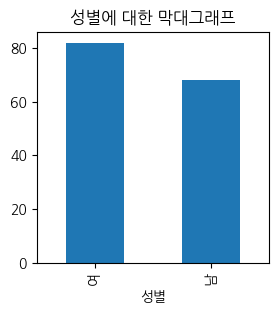

In [15]:
# 시각화
plt.figure(figsize=(3, 3)) # 그림 크기 지정
df["성별"].value_counts().plot(kind="bar")
plt.title("성별에 대한 막대그래프")
plt.show()

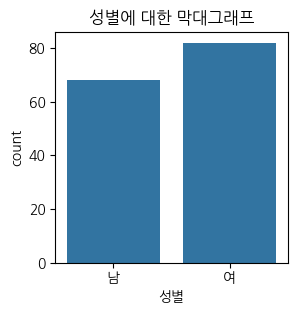

In [16]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x="성별")
plt.title("성별에 대한 막대그래프")
plt.show()

### (3) 만족도별 데이터 개수를 출력해주세요.

In [17]:
# value_counts()
df["만족도"].value_counts()

만족도
중    75
상    46
하    29
Name: count, dtype: int64

In [18]:
df["만족도"].value_counts().sort_index()

만족도
상    46
중    75
하    29
Name: count, dtype: int64

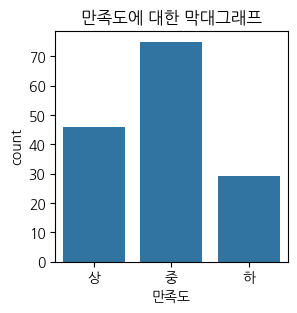

In [19]:
# 시각화
plt.figure(figsize=(3,3))
sns.countplot(data=df, x="만족도")
plt.title("만족도에 대한 막대그래프")
plt.show()

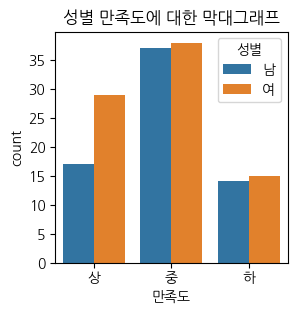

In [20]:
# 성별 만족도 시각화
plt.figure(figsize=(3,3))
sns.countplot(data=df, x="만족도", hue="성별")
plt.title("성별 만족도에 대한 막대그래프")
plt.show()

### (4) 평균 체류 시간(분)을 기준으로 가장 오래 체류한 상위 5개 데이터를 출력해주세요.

In [21]:
# 정렬 sort_values()
df.sort_values(by=["평균 체류 시간(분)"], ascending=False).head()

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
146,2024-05-26,남,부산,상,57.5,336.0,4,1
2,2024-01-03,남,서울,하,57.2,274.0,8,0
142,2024-05-22,여,서울,상,57.2,274.0,5,2
52,2024-02-22,남,대전,하,57.1,410.0,4,0
20,2024-01-21,여,광주,중,57.0,320.0,6,1


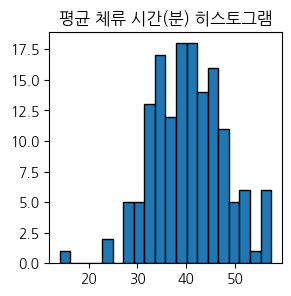

In [22]:
# 히스토그램 시각화 
plt.figure(figsize=(3,3))
plt.hist(df["평균 체류 시간(분)"], bins=20, edgecolor="black")
plt.title("평균 체류 시간(분) 히스토그램")
plt.show()

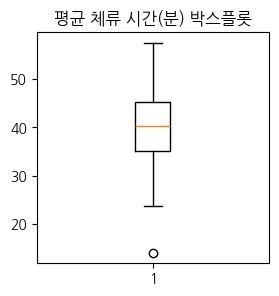

In [23]:
# 박스플롯 시각화 
plt.figure(figsize=(3,3))
plt.boxplot(x=df["평균 체류 시간(분)"])
plt.title("평균 체류 시간(분) 박스플롯")
plt.show()

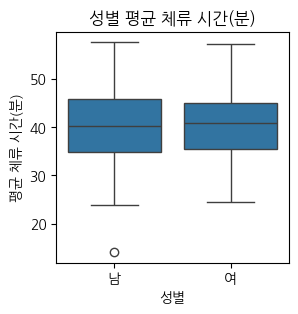

In [24]:
# 성별 평균 체류 시간(분)의 박스플롯
plt.figure(figsize=(3,3))
sns.boxplot(data=df, x="성별", y="평균 체류 시간(분)")
plt.title("성별 평균 체류 시간(분)")
plt.show()

### (5) 월 수입(만원)을 기준으로 가장 낮은 수입을 가진 하위 5개 데이터를 출력해주세요.

In [25]:
# 정렬 sort_values
df.sort_values(by=["월 수입(만원)"]).head()

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
89,2024-03-30,여,광주,하,44.8,182.0,1,1
0,2024-01-01,남,대전,상,40.4,193.0,3,0
60,2024-03-01,남,대전,중,35.3,196.0,5,1
49,2024-02-19,여,대전,상,45.3,198.0,3,2
143,2024-05-23,여,부산,중,33.9,212.0,8,2


### (6) 평균 체류 시간(분)의 전체 평균을 계산한 후, 평균 이상이면 "체류시간 김", 평균 미만이면 "체류기간 짧음"의 새로운 열을 생성해주세요.

In [26]:
# 평균 체류 시간(분)의 전체 평균
total_mean = df["평균 체류 시간(분)"].mean()
print(f"평균 체류 시간(분)의 평균은 {total_mean}분 입니다.")

평균 체류 시간(분)의 평균은 40.494분 입니다.


In [27]:
# 평균 체류 시간(분)의 데이터 하나하나를 x라고 하자.
# 조건: x >= total_mean , "체류시간 김" , 아니면 "체류기간 짧음"

#### 1번째 방법

In [28]:
# 1번째 방법
## 조건을 새로운 열로 만든다. 
## 대체한다. 
df["message"] = df["평균 체류 시간(분)"] >= total_mean
df.head()

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수,message
0,2024-01-01,남,대전,상,40.4,193.0,3,0,False
1,2024-01-02,여,대전,중,34.8,288.0,2,2,False
2,2024-01-03,남,서울,하,57.2,274.0,8,0,True
3,2024-01-04,남,대전,중,45.1,329.0,7,1,True
4,2024-01-05,남,서울,상,23.8,341.0,4,0,False


In [29]:
df["message"] = df["message"].replace({True: "체류기간 김", False: "체류기간 짧음"})
df

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수,message
0,2024-01-01,남,대전,상,40.4,193.0,3,0,체류기간 짧음
1,2024-01-02,여,대전,중,34.8,288.0,2,2,체류기간 짧음
2,2024-01-03,남,서울,하,57.2,274.0,8,0,체류기간 김
3,2024-01-04,남,대전,중,45.1,329.0,7,1,체류기간 김
4,2024-01-05,남,서울,상,23.8,341.0,4,0,체류기간 짧음
...,...,...,...,...,...,...,...,...,...
145,2024-05-25,남,광주,중,41.5,323.0,5,0,체류기간 김
146,2024-05-26,남,부산,상,57.5,336.0,4,1,체류기간 김
147,2024-05-27,남,대전,중,33.5,266.0,6,1,체류기간 짧음
148,2024-05-28,남,서울,중,33.3,358.0,8,0,체류기간 짧음


#### 2번째 방법

In [30]:
# np.where()
import numpy as np 

df["message2"] = np.where(df["평균 체류 시간(분)"] >= total_mean, "체류기간 김", "체류기간 짧음")
df.head()

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수,message,message2
0,2024-01-01,남,대전,상,40.4,193.0,3,0,체류기간 짧음,체류기간 짧음
1,2024-01-02,여,대전,중,34.8,288.0,2,2,체류기간 짧음,체류기간 짧음
2,2024-01-03,남,서울,하,57.2,274.0,8,0,체류기간 김,체류기간 김
3,2024-01-04,남,대전,중,45.1,329.0,7,1,체류기간 김,체류기간 김
4,2024-01-05,남,서울,상,23.8,341.0,4,0,체류기간 짧음,체류기간 짧음


#### 3번째 방법

In [31]:
# apply(함수)
# "체류기간 김" if x >= total_mean else "체류기간 짧음" # 한줄코드
df["message3"] = df["평균 체류 시간(분)"].apply(lambda x: "체류기간 김" if x >= total_mean else "체류기간 짧음")
df.head()

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수,message,message2,message3
0,2024-01-01,남,대전,상,40.4,193.0,3,0,체류기간 짧음,체류기간 짧음,체류기간 짧음
1,2024-01-02,여,대전,중,34.8,288.0,2,2,체류기간 짧음,체류기간 짧음,체류기간 짧음
2,2024-01-03,남,서울,하,57.2,274.0,8,0,체류기간 김,체류기간 김,체류기간 김
3,2024-01-04,남,대전,중,45.1,329.0,7,1,체류기간 김,체류기간 김,체류기간 김
4,2024-01-05,남,서울,상,23.8,341.0,4,0,체류기간 짧음,체류기간 짧음,체류기간 짧음


### (7) 이산형 변수를 시각화해주세요.

In [32]:
df.head(3)

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수,message,message2,message3
0,2024-01-01,남,대전,상,40.4,193.0,3,0,체류기간 짧음,체류기간 짧음,체류기간 짧음
1,2024-01-02,여,대전,중,34.8,288.0,2,2,체류기간 짧음,체류기간 짧음,체류기간 짧음
2,2024-01-03,남,서울,하,57.2,274.0,8,0,체류기간 김,체류기간 김,체류기간 김


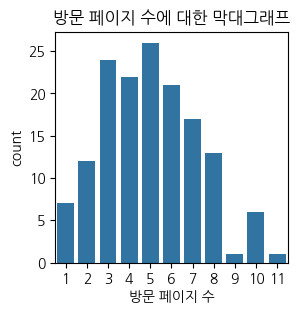

In [33]:
# 이산형 변수: 방문 페이지 수
plt.figure(figsize=(3,3))
sns.countplot(data=df, x="방문 페이지 수")
plt.title("방문 페이지 수에 대한 막대그래프")
plt.show()

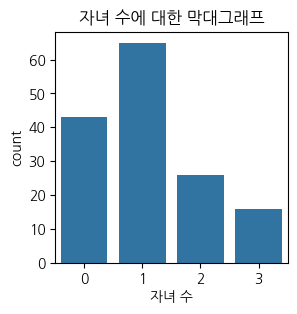

In [34]:
# 이산형 변수: 자녀 수 
plt.figure(figsize=(3,3))
sns.countplot(data=df, x="자녀 수")
plt.title("자녀 수에 대한 막대그래프")
plt.show()

### (8) 시계열 변수를 시각화해주세요.

In [35]:
df.head(3)

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수,message,message2,message3
0,2024-01-01,남,대전,상,40.4,193.0,3,0,체류기간 짧음,체류기간 짧음,체류기간 짧음
1,2024-01-02,여,대전,중,34.8,288.0,2,2,체류기간 짧음,체류기간 짧음,체류기간 짧음
2,2024-01-03,남,서울,하,57.2,274.0,8,0,체류기간 김,체류기간 김,체류기간 김


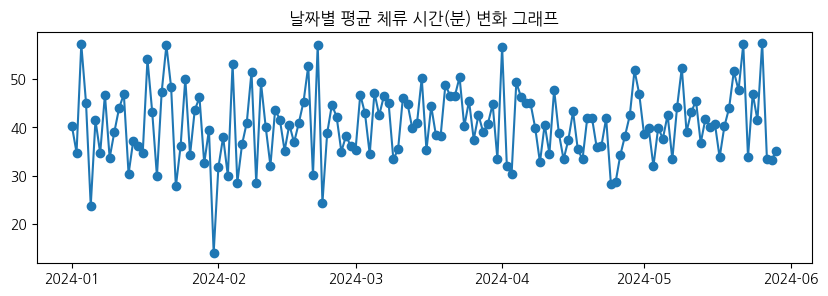

In [36]:
# 시계열 변수: 날짜
df["날짜"] = pd.to_datetime(df["날짜"])

plt.figure(figsize=(10,3))
plt.plot(df["날짜"], df["평균 체류 시간(분)"], marker="o", linestyle="-")
plt.title("날짜별 평균 체류 시간(분) 변화 그래프")
plt.show()

### (9) 연속형 변수들의 pair plot을 그려주세요.

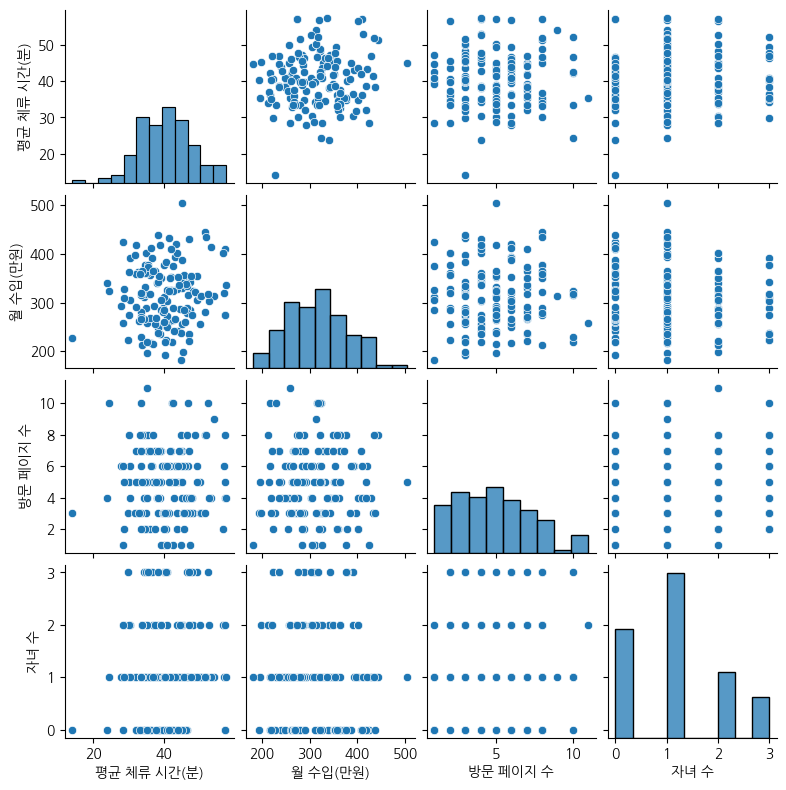

In [37]:
sns.pairplot(df, height=2)
plt.show()

### (10) 수치형 변수들의 상관관계를 히트맵으로 나타내주세요

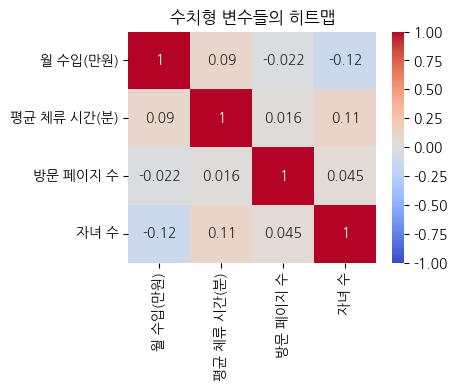

In [ ]:
select_columns = ["월 수입(만원)", "평균 체류 시간(분)", "방문 페이지 수", "자녀 수"]

corr = df[select_columns].corr()

plt.figure(figsize=(4,3))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    vmax=1,
    vmin=-1
)
plt.title("수치형 변수들의 히트맵")
plt.show()